# Notebook
*by T. Felipe and A. Asensio Ramos*

Local helioseismology techniques allow the detection of active regions in the non-visible solar hemisphere (far-side) by analyzing the oscillations in the visible side of the Sun. However, this identification is challenged by the low signal-to-noise of the seismic data, and only strong active regions can be reliably detected. 

In this notebook, we will show a method to improve the detection of active regions in far-side seismic maps using a machine learning algorithm.

This work is published in [Felipe & Asensio Ramos, 2019, A&A, 632, 82](https://www.aanda.org/articles/aa/abs/2019/12/aa36838-19/aa36838-19.html)


![example](figures/NN2019_002.jpg)
Detection of a far-side active region.



## Introduction
One of the most remarkable applications of local helioseismology is the
detection of active regions in the non-visible hemisphere of the Sun (on the far side).
This was first achieved using the technique of helioseismic holography
([Lindsey & Braun 2000, Science, 287, 1799](https://science.sciencemag.org/content/287/5459/1799.full), [Braun & Lindsey 2001, ApJ, 560, 189](https://iopscience.iop.org/article/10.1086/324323)). 

Helioseismic holography uses the wavefield measured in a region of the solar surface (called "pupil") to determine the wave field at a focus point that is located at the surface or at a certain depth. This inference is
performed assuming that the observed wave field at the pupil (e.g., the line-of-sight Doppler velocity) is produced by waves converging toward the focus point or waves diverging from that point. Far-side helioseismic holography is a particular application of this method, where the pupil is located at the near-side hemisphere and the focus points are located at the surface in the far-side hemisphere (see [Lindsey & Braun 2017, Space Weather, 15, 761](https://ui.adsabs.harvard.edu/abs/2017SpWea..15..761L/abstract)). 

The identification of active regions is founded
on the fact that they introduce a phase shift between ingoing and outgoing waves. This phase shift (which can be characterized as a travel-time shift) is mainly due to the depression of the photosphere in
magnetized regions, which causes the upcoming waves to reach the upper turning point a few seconds earlier in active regions than in quiet-Sun regions ([Felipe et al. 2017, A&A, 604, 126](https://ui.adsabs.harvard.edu/link_gateway/2017A%26A...604A.126F/PUB_HTML)). In this way, when an active region is located at the focus point, a negative phase shift (reduction in the travel
time) is found.


## Why using a neural network approach?

One of the main limitations of far-side helioseismology is the reduced signal-to-noise ratio. The signature of an active region detected on the far side has a
signal-to-noise ratio of around 10, which means that only large and strong active regions can be reliably detected in far-side phase-shift maps (about several hundered active regions per solar cycle).

Our aim in this work is to apply convolutional neural networks to learn a very fast and robust mapping between consecutive maps of estimated seismic maps and the probability map of the presence of an active region on the far side. The recent success of machine learning is  no doubt a consequence of our ability to train very deep neural networks (DNNs). DNNs can be seen as a very flexible and differentiable parametric mapping between an input space and an output space. These highly parameterized
DNNs are then tuned by optimizing a loss function that measures the ability of the DNN to map the input space onto the output space over a predefined training set. The combination of loss function and specific architecture has to be chosen to solve the specific problem at hand.

Arguably the largest number of applications of DNNs has been in computer vision. Problems belonging to the realm of machine vision can hardly be solved using classical methods, be they based on machine learning or on rule-based methods. Only now, with the application of very DNNs, have we been able to produce real advances. Applications in science, and specifically in astrophysics and solar physics, have leveraged the results of machine vision to solve problems that were difficult or impossible to deal with in the past with classical techniques.

## Description of the neural network
In this notebook, we present a description of the neural network developed for the detection of far-side active regions. We have included a running example of the application of the network and the tools employed for the interpretation of the results. 

We have omitted the materials employed for the training set. They are publicly available and their locations are indicated. We have described the transformations applied to the original data to convert them into the data fed to the neural network for the training.

### Training set
We have designed a neural network that can identify the presence of active
regions on the far side. As input, the network uses far-side phase-shift maps
computed using helioseismic holography. As a proxy for the presence of active
regions, we employed Helioseismic and Magnetic Imager (HMI) magnetograms measured on the near side (facing Earth). The details of the data are discussed in the following sections. 
The training set that we describe in this section was used to supervise the parameter tuning of the neural network with the aim of generalizing this to 
new data.

#### HMI magnetograms
The HMI magnetograms are one of the data products from the Solar Dynamics Observatory available through the Joint Science Operations Center (JSOC). In order to facilitate the comparison with the far-side seismic maps (next section), we are interested in magnetograms that are remapped onto a Carrington coordinate grid. We used data from the JSOC series *hmi.Mldailysynframe\_720s*. This data series contains synoptic maps constructed of HMI magnetograms collected over a 27-day solar rotation, where the first 120 degrees in longitude are replaced by data within 60 degrees of the central meridian of the visible hemisphere observed approximately at one time. These
maps are produced daily at 12 UT. We only employed the 120 degrees in longitude
including the magnetogram visible on the disk at one time. Magnetograms between
2010 June 1 (the first date available for the *hmi.Mldailysynframe\_720s*
data) and 2018 October 26 were extracted. Because one magnetogram is taken per day, this means a total of 3066 magnetograms. 

Because new active regions emerge and old regions decay,
magnetograms obtained on the near side are an inaccurate characterization of the
active regions on the far side half a rotation earlier or later. We have
partially corrected this problem. The far-side maps are associated with the
magnetogram that is obtained when the seismically probed region has fully rotated to the
Earth side, that is, 13.5 days after the measurement of the far-side map. We
removed the active regions that emerge on the near side because they were absent when the far-side seismic data were taken. In order to identify the
emerging active regions, we have employed the Solar Region Summary (SRS)
files (available at [ftp.swpc.noaa.gov/pub/warehouse/](ftp://ftp.swpc.noaa.gov/pub/warehouse/), where the NOAA registered active regions are listed. All the active regions that appear for the first time at a longitude greater than $-60^{\circ}$ (where 0 corresponds to the central meridian of the visible hemisphere and the minus sign indicates the eastern hemisphere) were masked in the magnetograms. The value of the magnetogram was set to zero in an area 15 degrees wide in longitude and 12 degrees wide in latitude, centered in the location of the active region reported in the SRS file of that date (after correcting for the longitude because we employed magnetograms retrieved at 12 UT and in the SRS files the location of the active regions are reported for 24 UT on the previous day). The active regions that emerge in the visible hemisphere too close to an active region that had appeared on the eastern limb due to the solar rotation were not masked. Of the 1652 active regions labeled by NOAA during the temporal period employed for the training set, 967 were masked because they emerged in the visible hemisphere.   

The neural network is trained with binary maps, where the zeros correspond to quiet regions and the ones to active regions. This  binary mask is built from the corrected magnetograms as follows. A Gaussian smoothing with a standard deviation of 3 degrees was applied to the corrected magnetograms. This smoothing removed all small-scale activity in the map and facilitated the segmentation of active regions of importance in the magnetogram.
Then, regions with a magnetic flux higher than 30 Mx cm$^2$ were identified as active regions (and set to 1), and regions with lower magnetic flux were set to 0. The middle panel in the bottom row from Fig. 1 shows the magnetogram after the active regions that emerged in the visible solar hemisphere were removed and after Gaussian smoothing was applied. The active region visible in the original magnetogram (bottom left panel in Fig. 1) at a longitude $-30^{\circ}$ and a latitude $-5^{\circ}$ emerged on the near side and was therefore masked. The bottom right panel of Fig. 1 shows the binary map in which the location of the remaining active regions is indicated, those whose magnetic flux is above the selected threshold. Their positions match that of some regions with strong negative travel times in the seismic maps from about half a rotation earlier (case "t-13.0" in the top row of Fig. 1).  
![training](figures/training_example.jpg)
**Fig. 1.** Example of one of the elements from the training set. Panels in the top row show 11 far-side seismic maps, each of them obtained from the analysis of 24 h of HMI Doppler data. The horizontal axis is the longitude (a total of 120°) and the vertical axis is the latitude (between −72° and 72°). The label above the panels indicates the number of days prior to the time t when the corresponding magnetogram was acquired (in this example, t is 2015 December 10 at 12:00 UT). Bottom row: magnetograms we used as a proxy for the presence of active regions. Left panel: original magnetogram in heliospheric coordinates, middle panel: magnetogram after active regions that emerged in the near side are removed and after a Gaussian smoothing was applied, and right panel: binary map in which a value of 1 indicates the presence of an active region in the locations whose magnetic flux in the smoothed magnetogram is above the selected threshold. Red contours in the bottom left panel delimit the regions where the binary map is 1. The neural network is trained by associating the 11 far-side seismic maps (top row) with the binary map. 




#### Far-side phase-shift maps

Phase-shift maps of the far-side region of the Sun are available through JSOC. They are computed from
HMI Doppler data using temporal series of one or five days. The processing of
series of five days is a novel approach since 2014, introduced to improve the
signal-to-noise ratio of the phase-shift maps. They are provided in Carrington
heliographic coordinates with a cadence of 12 hours (maps are obtained at 0 and
12 UT). In this work, we focus on the far-side maps computed from 24 hours
of Doppler data. We employed far-side maps between 2010 May 18 and 2018 October 12. For each map, we selected a $120^{\circ}$ region in longitude centered at the Carrington longitude of the central meridian of the visible hemisphere 13.5 days after the date of the far-side map. In this way, corrected magnetograms from which
the new active regions are removed are associated with far-side maps that sample the same region in longitude. The training employed 11 consecutive far-side maps for each corrected magnetogram, which improved the seismic signal. These 11 consecutive far-side maps correspond to six days of data. The latitude span of the maps is
between $-72^{\circ}$ and $72^{\circ}$. We chose a sampling of $1^{\circ}$ in both latitude and longitude.


##Architecture
The neural network of choice in 
this work is a U-net ([Ronneberger et al. 2015, ArXiv](https://arxiv.org/abs/1505.04597)), a fully
convolutional architecture that has been used extensively for dense segmentation of images and displayed in Fig. 2. The U-net 
is an encoder-decoder 
network, in which the input is
successively reduced in size through contracting layers and is finally increased in size through
expanding layers. This encoder-decoder architecture has three main advantages, all
of them a consequence of the contracting and expanding layers. The first
advantage is that the contracting layers reduce the size of the images at each step.
This makes the network faster because convolutions have to be carried out
over smaller images. The second advantage is that this contraction couples
together pixels in the input image that were far apart, so that smaller kernels
can be used in convolutional layers (we used $3 \times 3$ kernels) and the network
is able to better exploit multiscale information. The final
advantage is a consequence of the skip connections (gray 
arrows), which facilitates training by explicitly
propagating multiscale information from the contracting layers to the
expanding layers.

As shown in Fig. 2, the specific U-net architecture
we used in this work is a combination of several
differentiable operations. The first operation, indicated with blue arrows, is
the consecutive application of convolutions with 3$\times$3 kernels, 
batch normalization (BN), which normalizes the input so that its mean
is close to zero and its variance close to unity (which is known to
be an optimal range of values for neural networks to work best) and
a rectified linear unit (ReLU) activation function, given 
by  $\sigma(x)=\max(0,x)$. This combination 
Conv+BN+ReLU was repeated twice as indicated in
the legend of Fig. 2. Red arrows refer to 
max-pooling [(Goodfellow et al. 2016, Deep Learning, MIT Press)](http://www.deeplearningbook.org/), which reduces the resolution
of the images by a factor 2 by computing the maximum of all non-overlapping 
$2 \times 2$ patches in the image. The expanding layers again increase the size of the images
through bilinear interpolation (green arrows) followed by convolutional layers.
Additionally, the layers in the encoding part transfer information to the
decoding part through skip connections (gray arrows), which greatly 
improves the ability and stability of the network.
Finally, because the output is a probability map, we forced it to be in the $[0,1]$ range
through a sigmoid activation function that was applied in the last layer after a final
$1 \times 1$ convolution that we used to reduce the number of channels from 16 to 1.

The neural
network was trained by minimizing the binary cross entropy between the output of
the network per pixel ($p_i$) and the binarized magnetograms ($y_i$), summed
over all pixels in the output magnetogram ($N$),
\begin{equation}
    \ell = -\frac{1}{N} \sum_{i=1}^{N} y_{i} \cdot \log p_i+
    \left(1-y_{i}\right) \cdot \log \left(1-p_i\right)
.\end{equation}
To optimize the previous loss function, we employed the Adam optimizer [(Kingma & Ba 2014, ArXiv)](https://arxiv.org/abs/1412.6980) with a
constant learning rate of 3$\times$10$^{-4}$ during 300 epochs and a batch
size of 30.

The neural network can be downloaded from the repository [https://github.com/aasensio/farside](https://github.com/aasensio/farside).

Here we show the model.

![training](figures/U-net.png)
**Fig 2.** U-net architecture. The vertical extent of the blocks indicates the size of the image, and the numbers above each block shows the number of channels.


### Model

In [1]:
#We first import the necessary modules
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

ModuleNotFoundError: No module named 'torch'

In [ ]:
class double_conv(nn.Module):
    '''(conv => BN => ReLU) * 2'''
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(
            nn.MaxPool2d(2),
            double_conv(in_ch, out_ch)
        )

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        self.bilinear = bilinear

        #  would be a nice idea if the upsampling could be learned too,
        if not bilinear:
            self.up = nn.ConvTranspose2d(in_ch//2, in_ch//2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):

        if (self.bilinear):
            x1 = torch.nn.functional.interpolate(x1, scale_factor=2)        
        else:
            x1 = self.up(x1)
        
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX//2,
                        diffY // 2, diffY - diffY//2))
        
        # for padding issues, see 
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd

        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x


class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, n_hidden=64):
        super(UNet, self).__init__()
        self.inc = inconv(n_channels, n_hidden)
        self.down1 = down(n_hidden, 2*n_hidden)
        self.down2 = down(2*n_hidden, 4*n_hidden)
        self.down3 = down(4*n_hidden, 8*n_hidden)
        self.down4 = down(8*n_hidden, 8*n_hidden)
        self.up1 = up(16*n_hidden, 4*n_hidden)
        self.up2 = up(8*n_hidden, 2*n_hidden)
        self.up3 = up(4*n_hidden, n_hidden)
        self.up4 = up(2*n_hidden, n_hidden)
        self.outc = outconv(n_hidden, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        x = self.outc(x)
        return torch.sigmoid(x)

### Forward model

In [ ]:
class deep_farside(object):
    def __init__(self, maxbatch):

        self.cuda = torch.cuda.is_available()
        self.device = torch.device("cuda" if self.cuda else "cpu")
    
        torch.backends.cudnn.benchmark = True
        
        self.max_batch = maxbatch
                                
    def init_model(self, checkpoint=None, n_hidden=16):
        
        self.checkpoint = checkpoint

        self.model = UNet(n_channels=11, n_classes=1, n_hidden=n_hidden).to(self.device)
                
        if (self.cuda):
            checkpoint = torch.load('{0}.pth'.format(self.checkpoint))
        else:
            checkpoint = torch.load('{0}.pth'.format(self.checkpoint), map_location=lambda storage, loc: storage)
            
        self.model.load_state_dict(checkpoint['state_dict'])        
        
    def forward(self, phase):

        n_cases, n_phases, nx, ny = phase.shape

        assert (n_phases == 11), "n. phases is not 11"

        print("Normalizing data...")
            
        phase = np.nan_to_num(phase)

        phase -= np.mean(phase)
        phase /= np.std(phase)

        phase[phase>0] = 0.0

        self.model.eval()

        n_batches = n_cases // self.max_batch
        n_remaining = n_cases % self.max_batch

        print(" - Total number of maps : {0}".format(n_cases))
        print(" - Total number of batches/remainder : {0}/{1}".format(n_batches, n_remaining))
        
        magnetograms = np.zeros((n_cases,nx,ny))

        left = 0

        print("Predicting magnetograms...")

        with torch.no_grad():

            for i in range(n_batches):                
                right = left + self.max_batch
                phases = torch.from_numpy(phase[left:right,:,:,:].astype('float32')).to(self.device)                
                output = self.model(phases)

                magnetograms[left:right,:,:] = output.cpu().numpy()[:,0,:,:]

                left += self.max_batch

            if (n_remaining != 0):
                right = left + n_remaining
                phases = torch.from_numpy(phase[left:right,:,:,:].astype('float32')).to(self.device)                
                output = self.model(phases)
                magnetograms[left:right,:,:] = output.cpu().numpy()[:,0,:,:]
            

        return magnetograms

#Interpretation of the results
The neural network returns a probability $P$ map with values in the range $[0,1]$. An active region is then identified by examining these probability maps, instead of directly evaluating the travel times of the far-side seismic maps. We defined an integrated probability $P_{\rm i}$, computed
as the integral of the probability $P$ in a continuous feature. The concept of ``integrated probability'' is equivalent to the ``seismic strength'' defined by the traditional method. Rather than simply search for continuous regions with strong negative travel times, an approach that is hindered by the usual strong noise of the seismic data, the neural network provides a cleaner picture of the locations where an active region is most probable. However, the probability maps usually exhibit some significant values in regions with negative travel time as a result of noise.

It is necessary to define an unequivocal
criterion to decide whether a region with increased probability is claimed as an active region. We chose to define a threshold in the integrated probability as the minimum value for the detection of seismic sources, in the same way as the traditional method establishes a threshold in the seismic strength. The selection of the threshold was based on the evaluation of the artificial set of far-side maps for which we know the exact location of the seismic sources (see [Felipe & Asensio Ramos, 2019, A&A, 632, 82](https://www.aanda.org/articles/aa/abs/2019/12/aa36838-19/aa36838-19.html)). A value of $P_{\rm i}=100$ proved to be a good compromise between the success in detecting the seismic sources and avoiding the claim of false positives.  We note that when the network is applied to real data, false positives can be easily dealt with by discarding the cases where the detection does no appear consistently in successive dates at the same location.

## Examples

In this section, we apply the network to actual far-side seismic maps obtained from HMI. 
First, we need to install photutils and an appropriate version of astropy, since some of their routines will be employed for the interpretation of the network output.

In [ ]:
!pip install photutils astropy==3.2.3

     |████████████████████████████████| 983kB 4.8MB/s eta 0:00:01
     |████████████████████████████████| 6.3MB 34.6MB/s 
  Found existing installation: astropy 4.0
    Uninstalling astropy-4.0:
      Successfully uninstalled astropy-4.0


In [ ]:
#import some modules
import h5py
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils import detect_sources
from photutils import detect_threshold
import scipy.io
%matplotlib inline

Next, we download the data needed for these examples. We require the trained model (2019-04-02-11:27:48_hid_16_lr_0.0003_wd_0.0.pth) and some observed far-side maps. Each of the files farside_NN2019_003_dlong140.sav and test.h5 contains a set of consecutive far-side HMI seismic maps. The individual seismic maps have 140 points in longitude, with a resolution of 1 degree and centered at the central meridian of the non-visible solar hemisphere. The latitude coverage spans from -72 to 71 degrees, with the same resolution of 1 degree.


In [ ]:
!wget -O 2019-04-02-11:27:48_hid_16_lr_0.0003_wd_0.0.pth https://owncloud.iac.es/index.php/s/2xJpktVzVSx4YGy/download
!wget -O farside_NN2019_003_dlong140.sav https://owncloud.iac.es/index.php/s/Xtxn7OJ1fliUdw1/download
!wget -O test.h5 https://owncloud.iac.es/index.php/s/iax6sNFf9UYTtxR/download

--2020-02-26 10:22:27--  https://owncloud.iac.es/index.php/s/2xJpktVzVSx4YGy/download
Resolving owncloud.iac.es (owncloud.iac.es)... 161.72.1.40, 2001:720:1610:5001::28
Connecting to owncloud.iac.es (owncloud.iac.es)|161.72.1.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10146397 (9.7M) [application/octet-stream]
Saving to: ‘2019-04-02-11:27:48_hid_16_lr_0.0003_wd_0.0.pth’

2019-04-02-11:27:48 100%[===================>]   9.68M  3.85MB/s    in 2.5s    

2020-02-26 10:22:31 (3.85 MB/s) - ‘2019-04-02-11:27:48_hid_16_lr_0.0003_wd_0.0.pth’ saved [10146397/10146397]

--2020-02-26 10:22:32--  https://owncloud.iac.es/index.php/s/Xtxn7OJ1fliUdw1/download
Resolving owncloud.iac.es (owncloud.iac.es)... 161.72.1.40, 2001:720:1610:5001::28
Connecting to owncloud.iac.es (owncloud.iac.es)|161.72.1.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1777472 (1.7M) [application/octet-stream]
Saving to: ‘farside_NN2019_003_dlong140.sav’

farside_N

### Example 1
The file test.h5 includes a series of HMI far-side seismic maps, with the latitude and longitude coverage and resolution described above. First, we read the seismic maps.

In [ ]:
f = h5py.File('test.h5', 'r')
f.keys()

KeysView(<HDF5 file "test.h5" (mode r)>)

Next, we plot a random selection of those maps. Each panel shows a seismic map computed from 24 hours of Doppler velocity temporal series measured with HMI. The figure shows the general appearance of the far-side seismic maps. The horizontal axes are the longitude, and the vertical axes correspond to the latitude. The maps exhibit a distribution of positive (yellow) and negative (black) travel-time shifts. Negative travel-time shifts may correspond to far-side active regions but, as illustrated in these examples, these maps are very noisy and must be carefully interpreted.

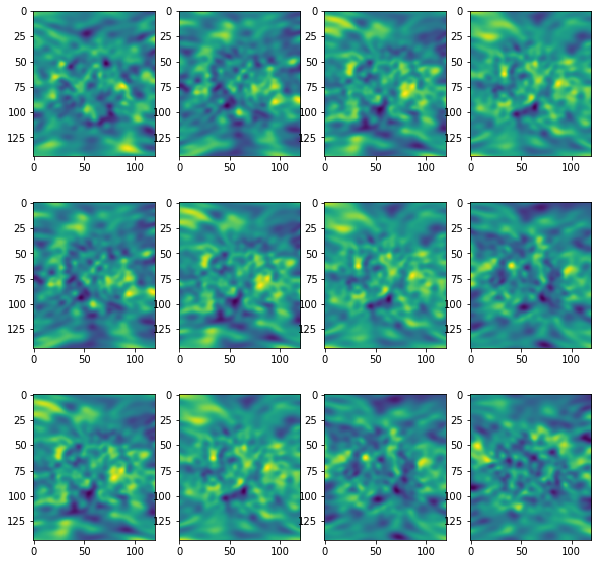

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(10,10))
for i in range(3):
    for j in range(4):
        ax[i,j].imshow(f['phases'][i,j,:,:])

We compute the probability maps applying the neural network to continuous series of 11 farside maps.

In [ ]:
deep_farside_network = deep_farside(maxbatch=20)    
deep_farside_network.init_model(checkpoint='2019-04-02-11:27:48_hid_16_lr_0.0003_wd_0.0', n_hidden=16)

In [ ]:
prob = deep_farside_network.forward(f['phases'][:])

Normalizing data...
 - Total number of maps : 20
 - Total number of batches/remainder : 1/0
Predicting magnetograms...


We can plot the probability maps obtained for a few randomly selected cases. These examples show a few small patches with increased probability. However, we need to evaluate each of these features to check if the can be claim as active regions. 

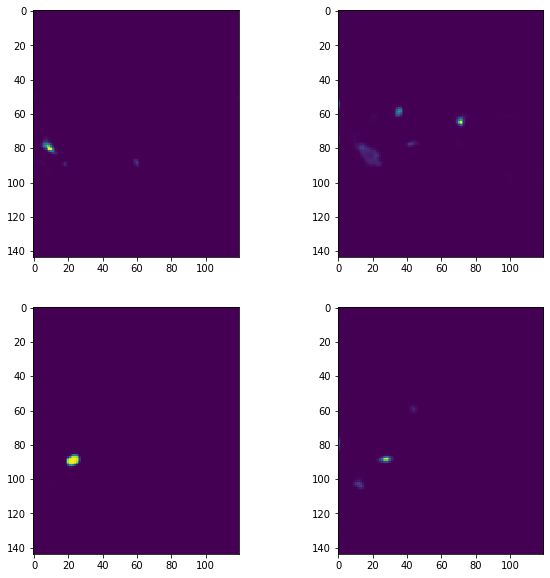

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = ax.flatten()
for i in range(4):
    ax[i].imshow(prob[i,:,:])

We employ the following routines to select features present in an specific map. In this example, we identify the feature found in the bottom left panel of the previous figure.

In [ ]:
sigma = 3.0 * gaussian_fwhm_to_sigma  # FWHM = 3.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
segm = detect_sources(prob[2,:,:], 0.01, npixels=5, filter_kernel=kernel)

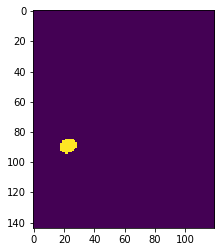

In [ ]:
plt.imshow(segm)

In [ ]:
tmp = prob[2,:,:]
(tmp[segm.data==1]).sum()

31.973699834255967

In this case, we obtain an integrated probability $P_i$=32. This value is below the threshold indicated in the previous section ($P_i$=100) and, thus, this feature cannot be claim as a far-side active region.

##Example 2

The file farside_NN2019_003_dlong140.sav contains 11 consecutive far-side HMI seismic maps. They were employed for the detection of the far-side active region labeled NN-2019-003 in [Felipe & Asensio Ramos, 2019, A&A, 632, 82](https://www.aanda.org/articles/aa/abs/2019/12/aa36838-19/aa36838-19.html) as illustrated in the second row of Fig. 6 from that paper. These seismic maps were measured between 1 February 2019 at 00:00 UT and 6 February 2019 at 00:00 UT, with a cadence of 12 hours. 
Similarly to the previous example, we start by reading the data and applying the forward model to the set of seismic maps.

In [ ]:
tmp = scipy.io.readsav('farside_NN2019_003_dlong140.sav')
tmp['data_out'].shape

(11, 144, 140)

In [ ]:
prob = deep_farside_network.forward(tmp['data_out'][None,:,:,:])

Normalizing data...
 - Total number of maps : 1
 - Total number of batches/remainder : 0/1
Predicting magnetograms...


The forward model returns the following probability map: 

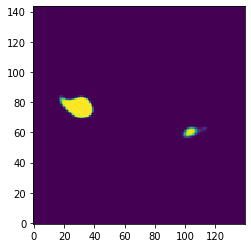

In [ ]:
plt.imshow(prob[0,:,:], origin='lower')

We identify the individual continuous regions with a certain probability for the presence of active regions. In this example, there are two independent features.

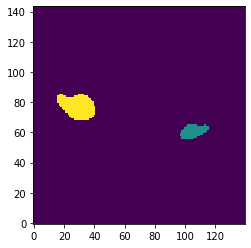

In [ ]:
sigma = 3.0 * gaussian_fwhm_to_sigma  # FWHM = 3.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
segm = detect_sources(prob[0,:,:], 0.01, npixels=5, filter_kernel=kernel)
plt.imshow(segm, origin='lower')

In [ ]:
tmp = prob[0,:,:]
(tmp[segm.data==2]).sum()

205.16914902971985

The big feature exhibits an integrated probability of $P_i$=205. This is above the threshold selected to claim a region with increased probability as an active region ($P_i$=100). We note that the value computed here is slightly different from the value reported in the publication. This discrepancy is due to the use of a different method for identifying the features in the probability map, but it does not affect the interpretation of the results. 
With regard to the small feature found in the previous figure: 

In [ ]:
tmp = prob[0,:,:]
(tmp[segm.data==1]).sum()

35.634890750574414

Its integrated probability is $P_i$=36 and, thus, our approach cannot guarantee its association to an actual far-side active region.